# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [35]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\yura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split


data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=240)



    __Задание 1.__ Обучение линейной регрессии.

    **(4 балла)**

    Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

    Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

Коэфф Ridge:
[  -4.1590416   -76.13613109  251.24314704  171.85857571   38.20231908
   -6.1645739  -111.76524395   95.56644513  234.16480993  127.22323132]
Коэфф Lasso:
[  0.          -0.         317.71466466   0.           0.
   0.          -0.           0.         337.77636922   0.        ]

Коэфф < 00.01:
0
8


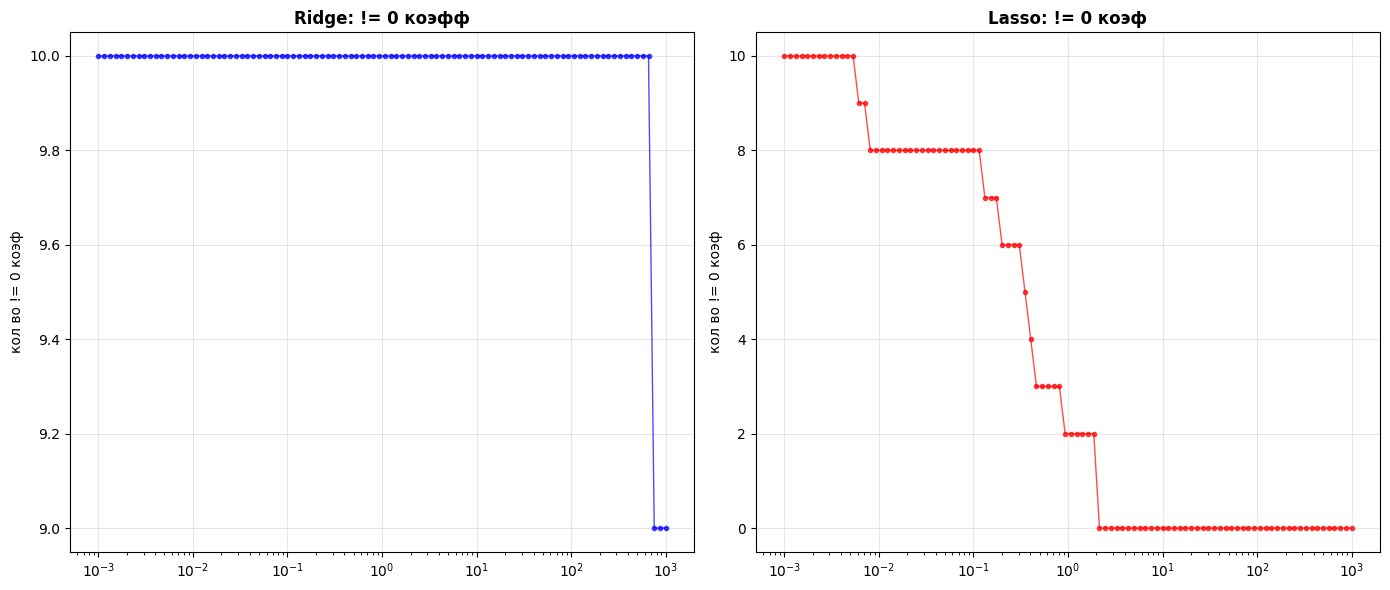

In [37]:
# Задание 1: Линейная регрессия с регуляризацией
# Делаю как понял из урока

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


ridge_model = Ridge()
lasso_model = Lasso()

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

print("Коэфф Ridge:")
print(ridge_model.coef_)
print("Коэфф Lasso:")
print(lasso_model.coef_)

threshold = 0.01

ridge_small = np.sum(np.abs(ridge_model.coef_) < threshold)
lasso_small = np.sum(np.abs(lasso_model.coef_) < threshold)

print(f"\nКоэфф < 0{threshold}:")
print(ridge_small)
print(lasso_small)


alphas = np.logspace(-3, 3, 100) 

ridge_counts = []
lasso_counts = []

for a in alphas:
    r = Ridge(alpha=a)
    r.fit(X_train, y_train)
    ridge_counts.append(np.sum(np.abs(r.coef_) > threshold))

    l = Lasso(alpha=a)
    l.fit(X_train, y_train)
    lasso_counts.append(np.sum(np.abs(l.coef_) > threshold))

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_counts, 'bo-', markersize=3, linewidth=1, alpha=0.7)
plt.xscale('log')
plt.title('Ridge: != 0 коэфф', fontsize=12, fontweight='bold')
plt.ylabel('кол во != 0 коэф')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_counts, 'ro-', markersize=3, linewidth=1, alpha=0.7)
plt.xscale('log')
plt.title('Lasso: != 0 коэф', fontsize=12, fontweight='bold')
plt.ylabel('кол во != 0 коэф')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

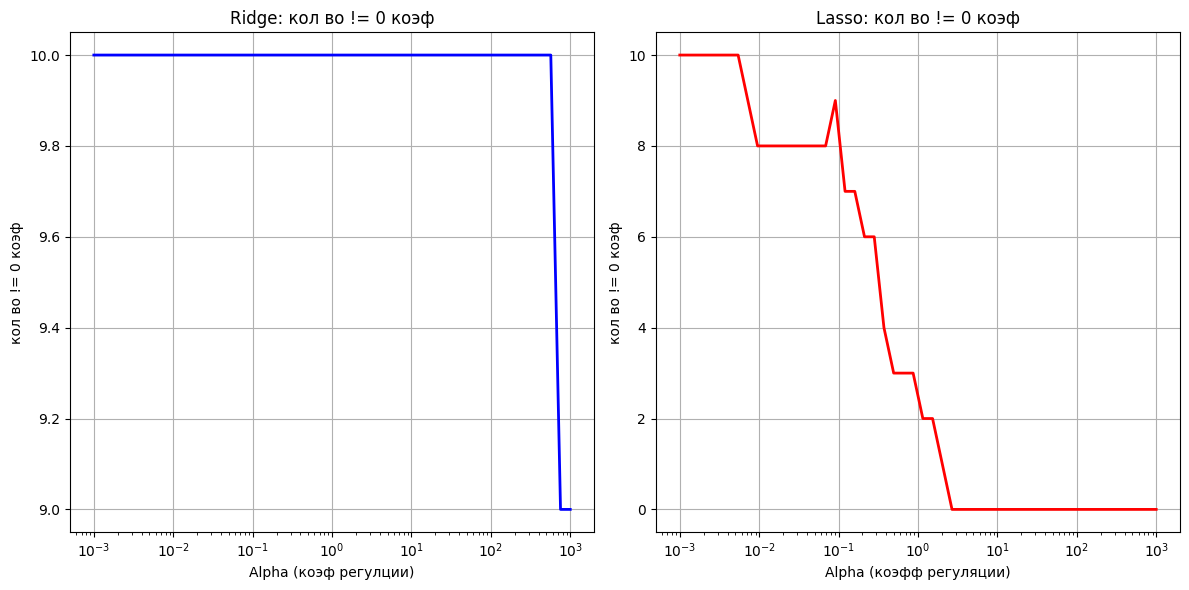

In [38]:

alphas = np.logspace(-3, 3, 50)

ridge_nonzero_counts = []
lasso_nonzero_counts = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    ridge_nonzero = np.sum(np.abs(ridge.coef_) > threshold)
    ridge_nonzero_counts.append(ridge_nonzero)
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_nonzero = np.sum(np.abs(lasso.coef_) > threshold)
    lasso_nonzero_counts.append(lasso_nonzero)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, ridge_nonzero_counts, 'b-', linewidth=2)
plt.title('Ridge: кол во != 0 коэф')
plt.xlabel('Alpha (коэф регулции)')
plt.ylabel('кол во != 0 коэф')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogx(alphas, lasso_nonzero_counts, 'r-', linewidth=2)
plt.title('Lasso: кол во != 0 коэф')
plt.xlabel('Alpha (коэфф регуляции)')
plt.ylabel('кол во != 0 коэф')
plt.grid(True)

plt.tight_layout()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

RMSE = 61.7441
MAE = 51.6444
R^2 = 0.4032


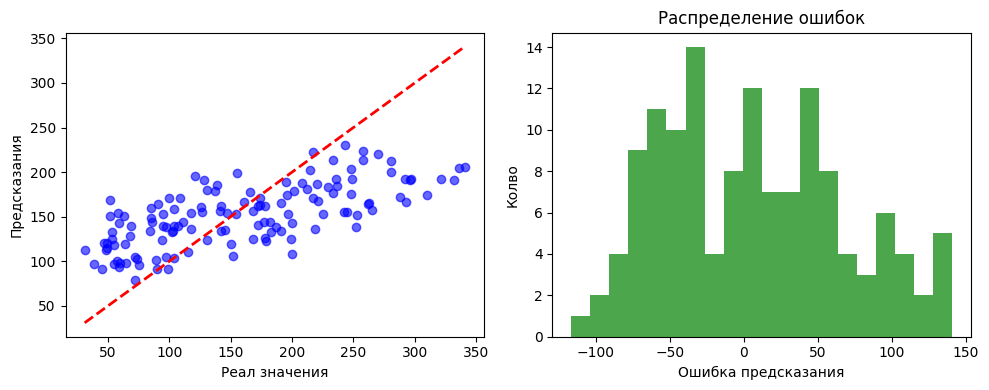

In [39]:

y_pred_ridge = ridge_model.predict(X_test)

rmse_val = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_val = mean_absolute_error(y_test, y_pred_ridge)
r2_val = r2_score(y_test, y_pred_ridge)

print(f"RMSE = {rmse_val:.4f}")
print(f"MAE = {mae_val:.4f}") 
print(f"R^2 = {r2_val:.4f}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Реал значения')
plt.ylabel('Предсказания')

errors = y_test - y_pred_ridge
plt.subplot(1, 2, 2)
plt.hist(errors, bins=20, alpha=0.7, color='green')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Колво')
plt.title('Распределение ошибок')

plt.tight_layout()
plt.show()

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

 best aplha:
RMSE: alpha = 0.0010
MAE: alpha = 0.0010
R²: alpha = 0.0010


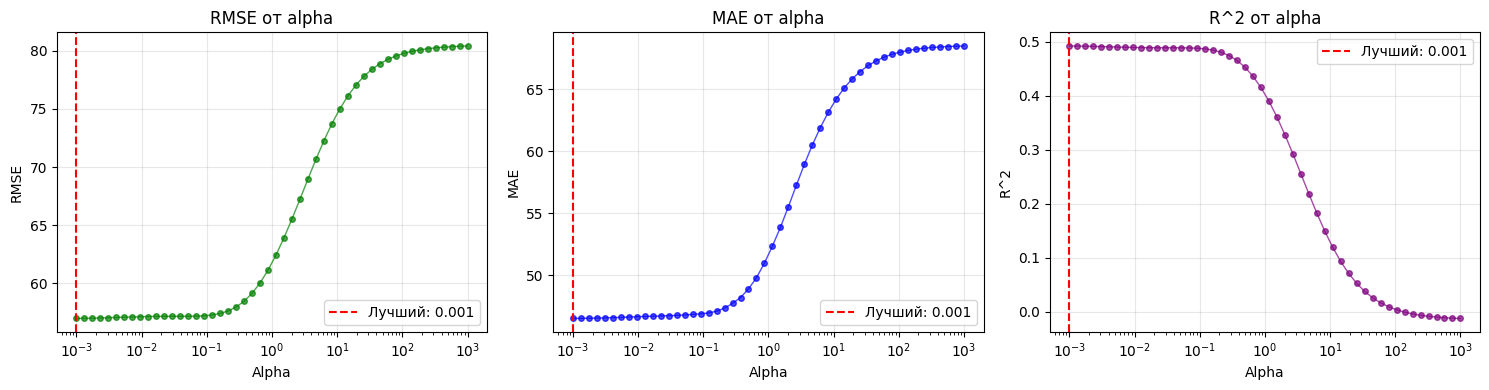

До:
  RMSE = 61.7441, MAE = 51.6444, R^2 = 0.4032
После:
  RMSE = 56.9557, MAE = 46.5100, R^2 = 0.4922

Улучшение:
RMSE: +7.76%
MAE: +9.94%
R^2: +22.07%
IMPROVE


In [40]:

alphas_tune = np.logspace(-3, 3, 50)

rmse_scores = []
mae_scores = [] 
r2_scores = []



for alpha in alphas_tune:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, preds)))
    mae_scores.append(mean_absolute_error(y_test, preds))
    r2_scores.append(r2_score(y_test, preds))

best_rmse_idx = np.argmin(rmse_scores)
best_mae_idx = np.argmin(mae_scores) 
best_r2_idx = np.argmax(r2_scores)

best_alpha_rmse = alphas_tune[best_rmse_idx]
best_alpha_mae = alphas_tune[best_mae_idx]
best_alpha_r2 = alphas_tune[best_r2_idx]

print(" best aplha:")
print(f"RMSE: alpha = {best_alpha_rmse:.4f}")
print(f"MAE: alpha = {best_alpha_mae:.4f}")
print(f"R²: alpha = {best_alpha_r2:.4f}")

plt.figure(figsize=(15, 4))

#rmse, mae, r^2
plt.subplot(1, 3, 1)
plt.plot(alphas_tune, rmse_scores, 'g-o', markersize=4, linewidth=1, alpha=0.7)
plt.axvline(x=best_alpha_rmse, color='red', linestyle='--', label=f'Лучший: {best_alpha_rmse:.3f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE от alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(alphas_tune, mae_scores, 'b-o', markersize=4, linewidth=1, alpha=0.7)
plt.axvline(x=best_alpha_mae, color='red', linestyle='--', label=f'Лучший: {best_alpha_mae:.3f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE от alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(alphas_tune, r2_scores, 'purple', marker='o', markersize=4, linewidth=1, alpha=0.7)
plt.axvline(x=best_alpha_r2, color='red', linestyle='--', label=f'Лучший: {best_alpha_r2:.3f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('R^2 от alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# измение качества с новым alpha

final_model = Ridge(alpha=best_alpha_rmse)
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
final_mae = mean_absolute_error(y_test, final_preds)
final_r2 = r2_score(y_test, final_preds)

print("До:")
print(f"  RMSE = {rmse_val:.4f}, MAE = {mae_val:.4f}, R^2 = {r2_val:.4f}")
print("После:")
print(f"  RMSE = {final_rmse:.4f}, MAE = {final_mae:.4f}, R^2 = {final_r2:.4f}")

improvement_rmse = ((rmse_val - final_rmse) / rmse_val) * 100
improvement_mae = ((mae_val - final_mae) / mae_val) * 100
improvement_r2 = ((final_r2 - r2_val) / abs(r2_val)) * 100

print(f"\nУлучшение:")
print(f"RMSE: {improvement_rmse:+.2f}%")
print(f"MAE: {improvement_mae:+.2f}%") 
print(f"R^2: {improvement_r2:+.2f}%")

if improvement_rmse > 0:
    print("IMPROVE")
else:
    print(":( WORSE")


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

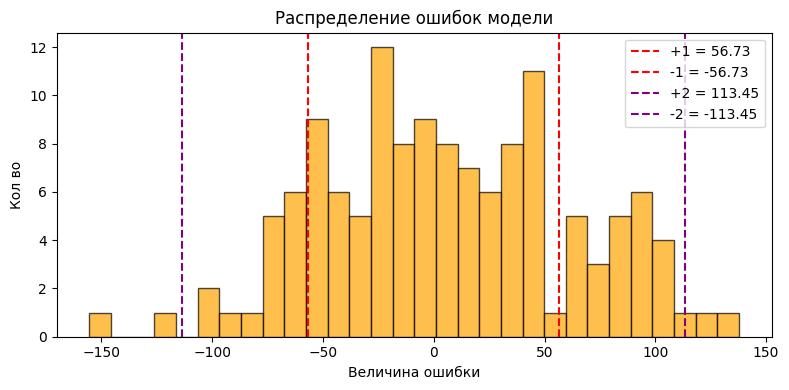

In [41]:
errors = y_test - final_preds

plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Величина ошибки')
plt.ylabel('Кол во')
plt.title('Распределение ошибок модели')

std_dev = np.std(errors)
plt.axvline(std_dev, color='red', linestyle='--', label=f'+1 = {std_dev:.2f}')
plt.axvline(-std_dev, color='red', linestyle='--', label=f'-1 = {-std_dev:.2f}')
plt.axvline(2*std_dev, color='purple', linestyle='--', label=f'+2 = {2*std_dev:.2f}')
plt.axvline(-2*std_dev, color='purple', linestyle='--', label=f'-2 = {-2*std_dev:.2f}')
plt.legend()

plt.tight_layout()
plt.show()
# внутри красных норм отклонение, в виофл ошибаются не сильно, за ними выбросы

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [42]:
clean_rmse = np.sqrt(mean_squared_error(y_test, clean_preds))

print("\nСРАВНЕНИЕ:")
print("Модель на всех данных:")
print(f"  RMSE = {final_rmse:.4f}")
print("Модель без выбросов:")
print(f"  RMSE = {clean_rmse:.4f}")

change_rmse = ((final_rmse - clean_rmse) / final_rmse) * 100
print(f"Изменение RMSE: {change_rmse:+.2f}%")

print("Стало хуже, может удалили какую то значимую инфу")


СРАВНЕНИЕ:
Модель на всех данных:
  RMSE = 56.9557
Модель без выбросов:
  RMSE = 57.8929
Изменение RMSE: -1.65%
Стало хуже, может удалили какую то значимую инфу


__Задание 3.__ Отчёт

**(2 балла)**

про 1 задание : Обучил модели: Ridge и Lasso с регуляризацией Ridge почти не обнуляет коэфы, Lasso обнуляет нормально так и при увеличении регуляризации коэффы -> 0
перебор a и его изменение  не сильно влияет.
 
про 2 задание: были выбросов, удалил часть выбросы, лучше не стало сильно, возможно удалил что то важное, возможно выбросов не супер много
